Importing all the necassary libraries for the analysis

In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,r2_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from xgboost import XGBClassifier
import joblib

# Data set used here is :
    [Synthetic medical symptoms](https://www.kaggle.com/datasets/khushikyad001/synthetic-medical-symptoms-and-diagnosis-dataset)

In [46]:
dataset = pd.read_csv('synthetic_medical_dataset_fixed.csv')
print("Let's Visualize and preform EDA: \n")

print("Dataset Info: \n",)
dataset.info()


Let's Visualize and preform EDA: 

Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5000 non-null   int64  
 1   gender             5000 non-null   object 
 2   fever              5000 non-null   float64
 3   cough              5000 non-null   float64
 4   fatigue            5000 non-null   float64
 5   headache           5000 non-null   float64
 6   muscle_pain        5000 non-null   float64
 7   nausea             5000 non-null   float64
 8   vomiting           5000 non-null   float64
 9   diarrhea           5000 non-null   float64
 10  skin_rash          5000 non-null   float64
 11  loss_smell         5000 non-null   float64
 12  loss_taste         5000 non-null   float64
 13  systolic_bp        5000 non-null   float64
 14  diastolic_bp       5000 non-null   float64
 15  heart_rate         50

In [47]:
print("Dataset Description: \n",dataset.describe())

Dataset Description: 
               age        fever        cough      fatigue     headache  \
count  5000.00000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.60120     2.237600     1.777800     1.974200     1.581400   
std      25.82178     0.784901     1.143979     0.780805     0.912765   
min       1.00000     0.000000     0.000000     0.000000     0.000000   
25%      23.00000     2.000000     1.000000     1.000000     1.000000   
50%      46.00000     2.000000     2.000000     2.000000     2.000000   
75%      68.00000     3.000000     3.000000     3.000000     2.000000   
max      89.00000     3.000000     3.000000     3.000000     3.000000   

       muscle_pain       nausea     vomiting     diarrhea    skin_rash  ...  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  ...   
mean      1.954800     1.514200     1.022000     1.489200     0.756800  ...   
std       0.795791     0.828212     0.785391     0.831157     0.911822  ...   
min

In [48]:
print("Few Elements of the Data: \n")
dataset.head()

Few Elements of the Data: 



,age,gender,fever,cough,fatigue,headache,muscle_pain,nausea,vomiting,diarrhea,...,diastolic_bp,heart_rate,temperature_c,oxygen_saturation,wbc_count,hemoglobin,platelet_count,crp_level,glucose_level,diagnosis
0,51,Male,1.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,...,73.6,86.0,38.2,98.5,4.52,11.35,148.4,4.53,109.8,COVID-19
1,71,Male,2.0,3.0,2.0,2.0,2.0,2.0,0.0,3.0,...,86.6,77.5,38.6,85.8,8.31,11.28,304.6,30.09,119.7,Pneumonia
2,48,Female,3.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,84.5,80.6,37.0,97.5,5.22,14.00,95.2,23.24,97.6,Malaria
3,19,Female,3.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,...,84.2,74.0,38.2,97.5,4.82,13.49,147.4,18.72,111.2,Dengue
4,6,Male,3.0,0.0,1.0,3.0,3.0,2.0,2.0,1.0,...,66.8,107.7,37.9,96.7,6.81,13.24,299.7,10.73,83.0,Influenza


In [49]:
#Performing EDA 
dataset.isnull().sum()

age                  0
gender               0
fever                0
cough                0
fatigue              0
headache             0
muscle_pain          0
nausea               0
vomiting             0
diarrhea             0
skin_rash            0
loss_smell           0
loss_taste           0
systolic_bp          0
diastolic_bp         0
heart_rate           0
temperature_c        0
oxygen_saturation    0
wbc_count            0
hemoglobin           0
platelet_count       0
crp_level            0
glucose_level        0
diagnosis            0
dtype: int64

In [ ]:
le = LabelEncoder()
dataset['diagnosis'] = le.fit_transform(dataset['diagnosis'])

X = dataset.drop('diagnosis',axis=1)
y = dataset['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (4000, 23)
Test shape: (1000, 23)


['label_encoder.pkl']

In [ ]:
#label encoder pkl file 
joblib.dump(le,'label_encoder.pkl')

Visualizing a countplot: 


([0, 1, 2, 3, 4],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

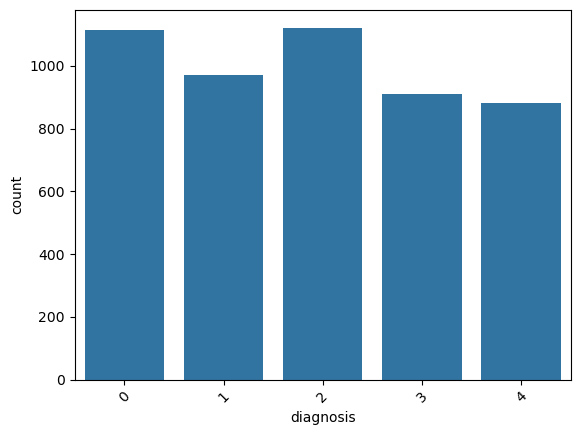

In [51]:
#plotting a countplot 
print("Visualizing a countplot: ")
sns.countplot(data=dataset,x='diagnosis')
plt.xticks(rotation=45)

Exploring Feature Distribution: 


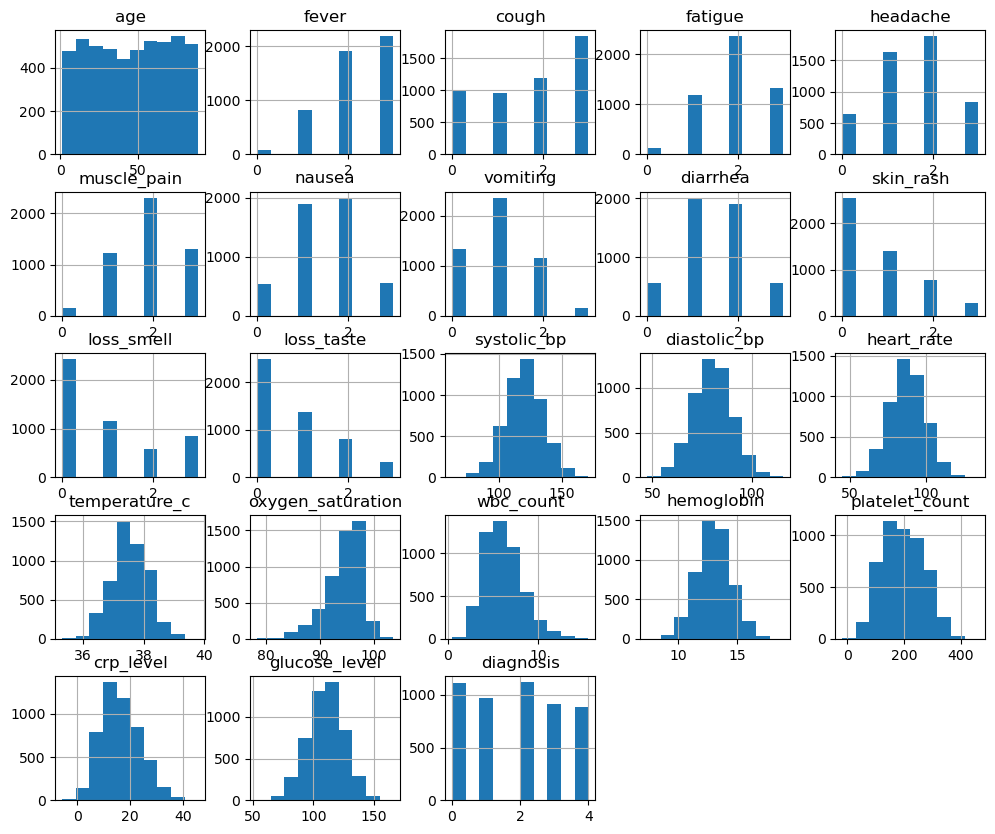

In [52]:
print("Exploring Feature Distribution: ")
numerical = dataset.select_dtypes(include=['int64','float64']).columns
dataset[numerical].hist(figsize=(12,10))
plt.show()

Visualizing a correlation map


<Axes: >

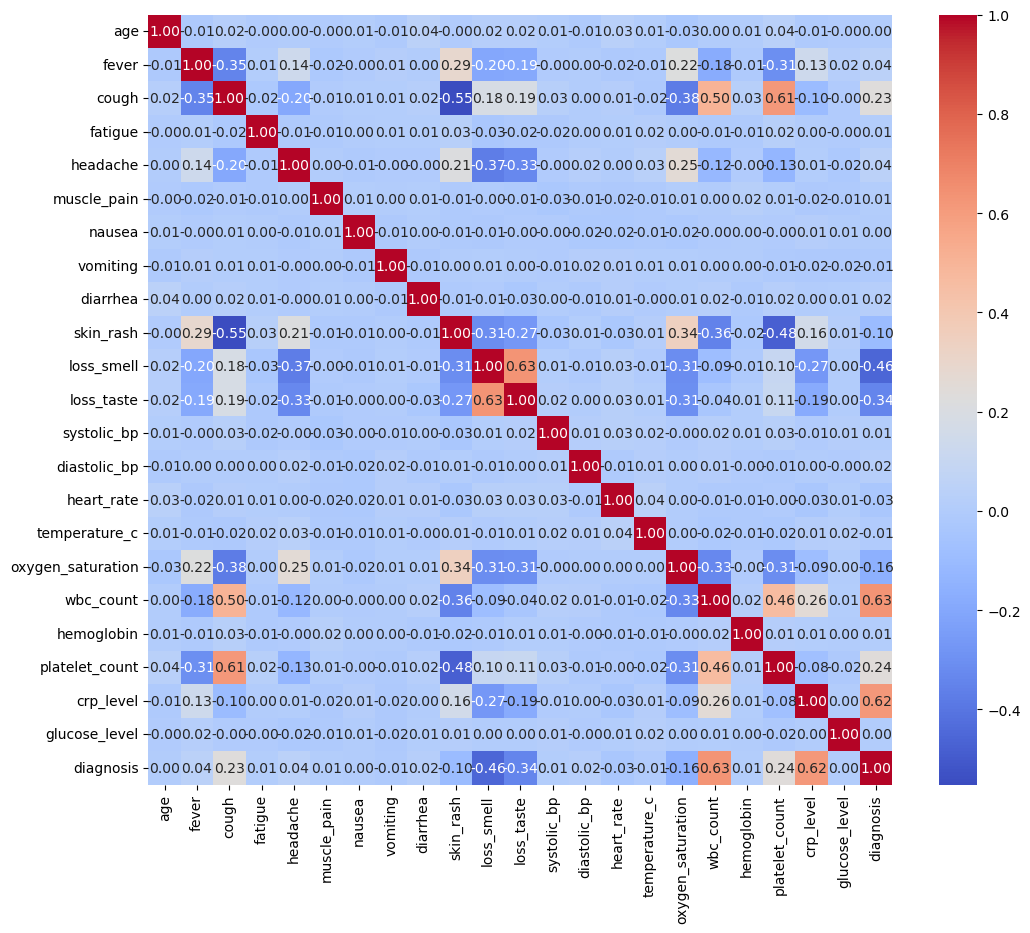

In [53]:
print("Visualizing a correlation map")
plt.figure(figsize=(12,10))
sns.heatmap(dataset[numerical].corr(),annot=True,cmap='coolwarm',fmt='.2f')

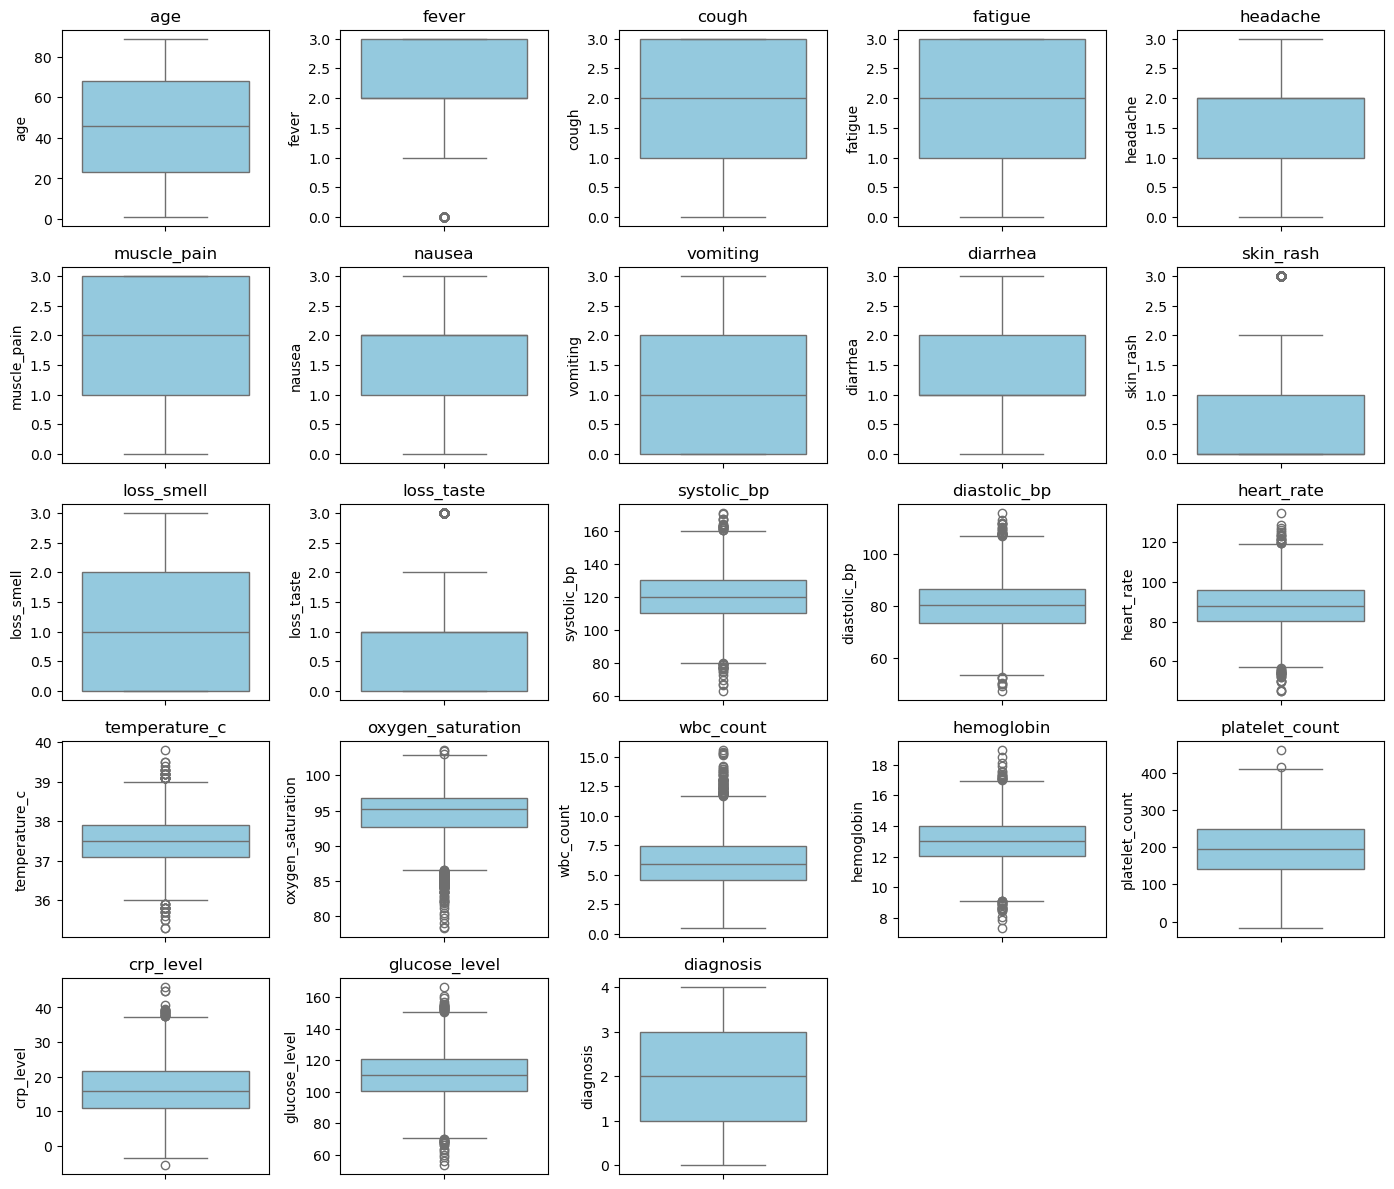

In [54]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=dataset[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


In [55]:
#Feature Engineering (feature extraction , feature selection using methods like filter )
symptom_cols = [col for col in X.columns if X[col].dtype == 'int64' and X[col].max() <= 3]
X['symptom_count'] = X[symptom_cols].sum(axis=1)


In [56]:
#Mean Arterial Pressure (MAP)
X['map'] = (X['systolic_bp'] + 2 * X['diastolic_bp']) / 3
#Pulse Pressure
X['pulse_pressure'] = X['systolic_bp'] - X['diastolic_bp']
#Fever severity:
X['fever_intensity'] = X['temperature_c'] - 37.0
#Hypoxia indicator:
X['low_o2_flag'] = (X['oxygen_saturation'] < 94).astype(int)
#Tachycardia indicator:
X['high_hr_flag'] = (X['heart_rate'] > 100).astype(int)
#Blood panel
X['inflammation_score'] = X['wbc_count'] * X['crp_level']
X['anemia_risk'] = (X['hemoglobin'] < 12).astype(int)

print("New Features are engineered and created successfully!")

New Features are engineered and created successfully!


In [57]:
categorical_feature = ['gender']
numeric_feature = [col for col in X_train.columns if col not in categorical_feature]

preprocess = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_feature),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feature)
    ]
)

# Feature selection
feature_selector = SelectKBest(score_func=chi2, k=15)

print("Preprocessing pipeline created!")
print("Numeric columns:", len(numeric_feature))
print("Categorical columns:", categorical_feature)
print("Best features are selected using SelectKBest and Chi^2 technique")

Preprocessing pipeline created!
Numeric columns: 22
Categorical columns: ['gender']
Best features are selected using SelectKBest and Chi^2 technique


In [58]:
#since we have 22 feature columns and all the features looks important we proceed with PCA it gives us the strongest combined factors 
pca = PCA(n_components=6)
print("PCA is created and rady with 10 components!")

PCA is created and rady with 10 components!


In [ ]:
#Now we are going to build a full pipeline for the prediction of diagnosis using random forest classifier 
model = RandomForestClassifier(n_estimators=200,max_depth=None,random_state=42)

pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('chi2',feature_selector),
    ('pca',pca),
    ('model',model)
])

print("Full Pipeline is created successfuly!")
pipe

Full Pipeline is created successfuly!


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'fever', 'cough',
                                                   'fatigue', 'headache',
                                                   'muscle_pain', 'nausea',
                                                   'vomiting', 'diarrhea',
                                                   'skin_rash', 'loss_smell',
                                                   'loss_taste', 'systolic_bp',
                                                   'diastolic_bp', 'heart_rate',
                                                   'temperature_c',
                                                   'oxygen_saturation',
                                                   'wbc_count', 'hemoglobin',
                                                   'platelet_count',
                                                   'crp_level',
                                                   'glucose_level']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender'])])),
                ('chi2',
                 SelectKBest(k=15,
                             score_func=<function chi2 at 0x000001E27A1EBF60>)),
                ('pca', PCA(n_components=6)),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [ ]:
#Training the pipeline and evaluation 
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score",accuracy)

print("\nClassification Report :\n")
print(classification_report(y_test,y_pred))


Accuracy Score 0.81

Classification Report :

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       239
           1       0.81      0.81      0.81       188
           2       0.80      0.79      0.79       222
           3       0.72      0.73      0.73       181
           4       0.72      0.71      0.71       170

    accuracy                           0.81      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.81      0.81      0.81      1000



['randomForest_model.pkl']

In [ ]:
#random forest pkl file 
joblib.dump(pipe,'randomForest_model.pkl')

In [71]:
#lets try hyperparameter tuning 
rf_tune = RandomForestClassifier(random_state=42)

param_grid = {
    'model__n_estimators': [100,200,300],
    'model__max_depth': [None,10,20,30],
    'model__min_samples_split': [2,5,10],
    'model__min_samples_leaf': [1,2,4]
}

grid = GridSearchCV(estimator=pipe,param_grid=param_grid,cv=3,scoring='accuracy',n_jobs=-1,verbose=1)

grid.fit(X_train,y_train)

print("\nBest Params:", grid.best_params_)
print("Best Training Accuracy:", grid.best_score_)

best_pipeline = grid.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Params: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 300}
Best Training Accuracy: 0.8142491020056363


In [78]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

pipeline_xgb = Pipeline(steps=[
    ('preprocess',preprocess),
    ('model',xgb_model)
])

print("XGBoost Pipeline created!")

XGBoost Pipeline created!


In [79]:
pipeline_xgb.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'fever', 'cough',
                                                   'fatigue', 'headache',
                                                   'muscle_pain', 'nausea',
                                                   'vomiting', 'diarrhea',
                                                   'skin_rash', 'loss_smell',
                                                   'loss_taste', 'systolic_bp',
                                                   'diastolic_bp', 'heart_rate',
                                                   'temperature_c',
                                                   'oxygen_saturation',
                                                   'wbc_count', 'hemoglobin',
                                                   'platelet_count',
                                                   'crp_level',
                                                   'glucos...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [80]:
y_pred = pipeline_xgb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {acc:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.9330

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       239
           1       0.91      0.87      0.89       188
           2       0.94      0.96      0.95       222
           3       0.85      0.87      0.86       181
           4       0.97      0.96      0.97       170

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [81]:
#XGboost model pkl file 
joblib.dump(pipeline_xgb,'XGB_model_pipeline.pkl')

['XGB_model_pipeline.pkl']